In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time

First, let's define the TSP problem. TSP stands for "Traveling Salesman Problem" and is a classical optimization problem in computer science. In TSP, given a set of cities and the distances between each pair of cities, the goal is to find the shortest possible route that visits every city exactly once and returns to the starting city.

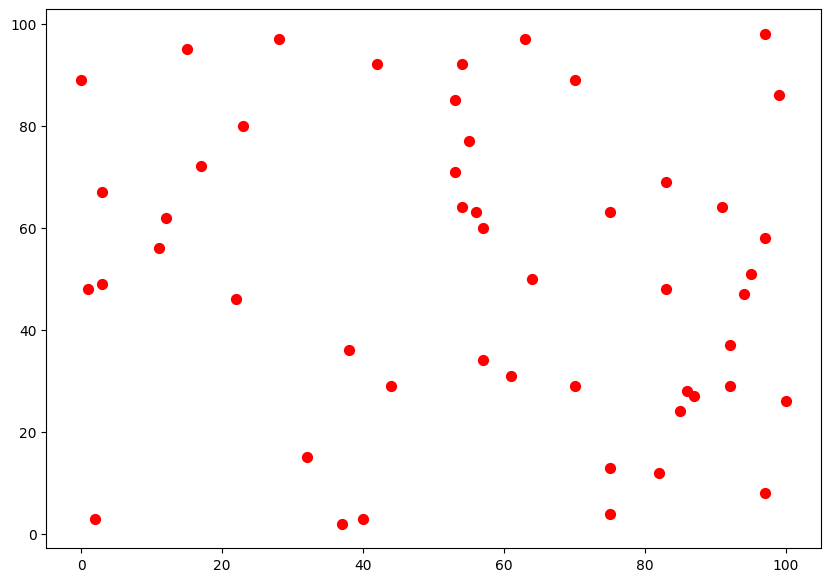

In [8]:
# Define the points as an array of (x,y) coordinates
n = 50
random.seed(1)
points = np.array([[random.randint(0, 100), random.randint(0, 100)] for i in range(n)])

# Plot the points on a 2D plane
plt.rcParams['figure.figsize'] = [10, 7]
plt.scatter(points[:,0], points[:,1], color = 'r', s=50)
plt.show()

# Compute the Euclidean distances between each pair of points to create the distance matrix
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        distance_matrix[i,j] = np.linalg.norm(points[i]-points[j])

This code defines an array of (x,y) coordinates that represent the positions of each city on a 2D plane. It then uses the scatter() function from the matplotlib.pyplot module to plot the cities on the 2D plane. Finally, it computes the Euclidean distances between each pair of cities using the numpy.linalg.norm() function, and stores these distances in a distance matrix that can be used as input to any of the TSP-solving functions provided above.

In [9]:
# plots a TSP solution
def figure_TSP(sol):
    ax = plt.gca()
    ax.cla() # clear things for fresh plot

    # change default range
    ax.set_xlim((-5, 105))
    ax.set_ylim((-5, 105))
    a = []
    b = []
    
    
    for i in sol:
        ax.plot(points[i][0],points[i][1], 'o',color = 'r', markersize=7)
        a = np.append(a, points[i][0])
        b = np.append(b, points[i][1])    
    a = np.append(a, points[sol[0]][0])
    b = np.append(b, points[sol[0]][1]) 
    ax.plot(a,b)
    for i in sol:
        ax.plot(points[i][0],points[i][1], 'o',color = 'r', markersize=7)
    plt.show() 

In [10]:
# compute the total length of a solution
def total_distance(route, distance_matrix):
    if not route[0] == route[-1]:
        route.append(route[0])
    total_dist = 0
    for i in range(1, len(route)):
        total_dist += distance_matrix[route[i-1], route[i]]
    return total_dist

### Nearest Neighbour Heuristic
The nearest neighbour heuristic is a simple algorithm that starts at a random city and repeatedly visits the nearest city that has not yet been visited. It returns the route obtained by this process.

In [11]:
def nearest_neighbour_tsp(distance_matrix):
    """
    Solve the TSP problem using the nearest neighbour heuristic.

    Args:
        distance_matrix: A square matrix where element (i,j) is the distance between city i and city j.

    Returns:
        A list containing the cities in the order they should be visited to obtain the shortest route.
    """
    num_cities = distance_matrix.shape[0] 
    route = [0]  
    unvisited_cities = set(range(1, num_cities)) 
    while unvisited_cities: 
        # take the city for which distance is minimized, 
        i = route[-1]
        for j in unvisited_cities:
            nearest = distance_matrix[i,j]
            if distance_matrix[i,j] <= nearest:
                nearest = distance_matrix[i,j]
        nearest = min(unvisited_cities, key=lambda city: distance_matrix[i,city])
        # call it "nearest city"
        
        # append "nearest city" to route
        route.append(nearest)
        # remove "nearest city" from unvisited cities
        unvisited_cities.remove(nearest)
    route.append(0) # Return to starting city
    return route

In [12]:
# distance between two cities i, j
# distance_matrix[i, j]

# taking last element from route
# route[-1]

# finding the element in a Set that minimizes a certain function:
# min_element = min(Set, key=lambda element: function(element))

# add element to list
# List.append(element)

# remove element from set 
# Set.remove(element)


Here, we start at city 0 and initialize a set unvisited_cities with all the other cities. We repeatedly add the nearest unvisited city to the route until all cities have been visited. Finally, we return to the starting city. The min function with the key argument is used to find the nearest unvisited city.

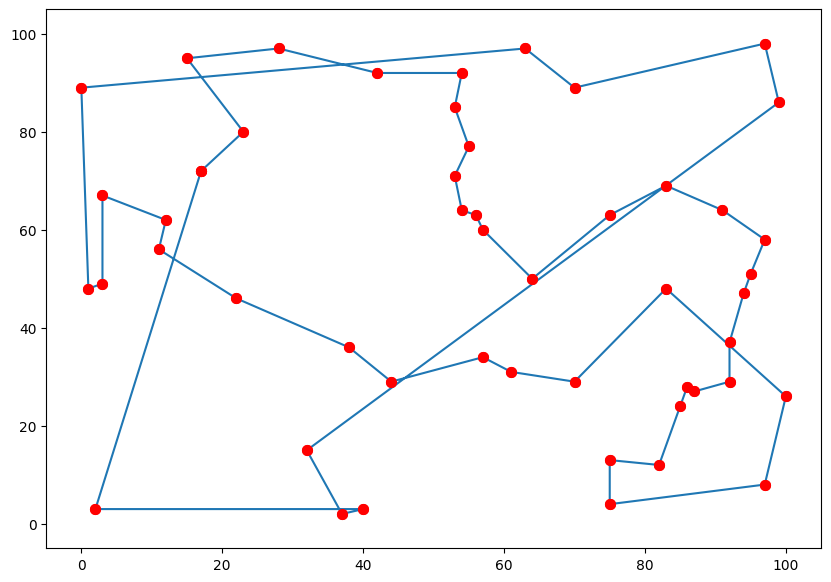

Length =  805.4974003341896
Solve time =  0.004682064056396484


In [13]:
start_time = time.time()
nn_tour = nearest_neighbour_tsp(distance_matrix)
solve_time = time.time()-start_time
figure_TSP(nn_tour)
total_length = total_distance(nn_tour, distance_matrix)
print("Length = ",  total_length)
print("Solve time = ", solve_time)

### 2-Opt Heuristic
The 2-opt heuristic is a local search algorithm that starts with a route and repeatedly tries to find better routes by swapping pairs of edges that intersect. It returns the best route obtained by this process.

In [20]:
def two_opt_tsp(distance_matrix):
    """
    Solve the TSP problem using the 2-opt heuristic.

    Args:
        distance_matrix: A square matrix where element (i,j) is the distance between city i and city j.

    Returns:
        A list containing the cities in the order they should be visited to obtain the shortest route.
    """
    def reverse_segment(route, i, j):
        """Reverse the order of cities from index i to index j in a route."""
        new_route = route[:i] + route[i:j+1][::-1] + route[j+1:]
        return new_route

    # Start with NN route
    route = nearest_neighbour_tsp(distance_matrix)
    size = len(route)
    improved = True
    best_distance = total_distance(route, distance_matrix)
    while improved:
        best = total_distance(route, distance_matrix) 
        improved = False
        # for all possible combinations of edges
        for i in range(size-2): # edge i to i+1
            for j in range(i+2, size-1): # edge j to j+1
                # Calculate gain: old edges - new edges
                # print(i,j)
                # print(route)
                gain = distance_matrix[route[i],route[i+1]] + distance_matrix[route[j],route[j+1]] - (distance_matrix[route[i],route[j]] + distance_matrix[route[i+1],route[j+1]])
                if gain > 1e-8:
                    route = reverse_segment(route, i+1, j)
                # if total_distance(route, distance_matrix) < best_distance:
                    best_distance -= gain
                    improved = True
                    
                    break
                # if gain > 0 then reverse the middle segment, 
                # set improved to True, update "best_distance" variable 
                # and exit the current j-loop (break)
    return route

Here, we start with a simple route that visits cities in the order they appear. We repeatedly try to improve the route by swapping pairs of edges that intersect, until no further improvement is possible. The 'reverse_segment' function is used to swap the order of cities between two indices in a route.

In [21]:
# # insert a list2 into another list1 at element i 
# new_list = list1[:i] + list2 + route[i+1:]

# # invert a list1
# new_list = list1[::-1]

# # take all elements from index i to index j from a list1:
# new_list = list1[i:j+1]

# # exit a loop at any point
# break

# # shorter notation for x = x - y 
# x -= y

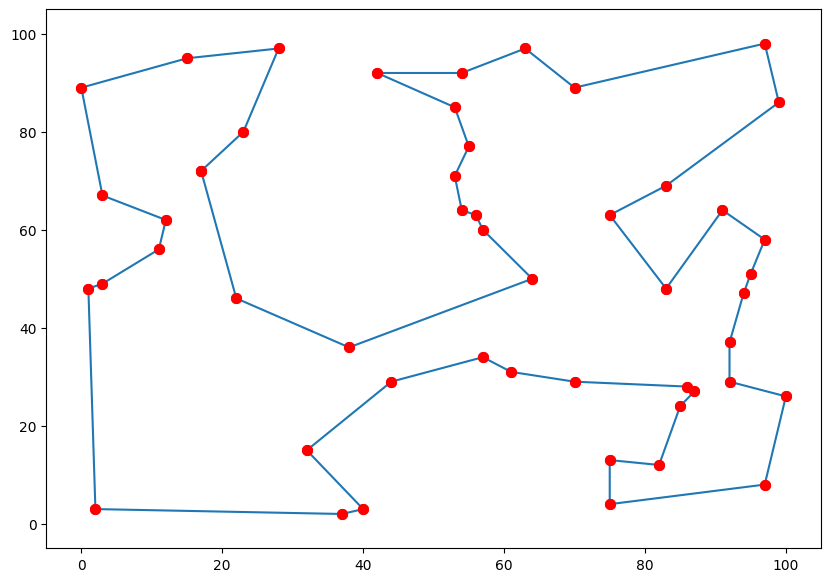

Length =  658.3492010827817
Solve time =  0.018679141998291016


In [22]:
start_time = time.time()
TwoOpt_tour = two_opt_tsp(distance_matrix)
solve_time = time.time()-start_time
figure_TSP(TwoOpt_tour)
total_length = total_distance(TwoOpt_tour, distance_matrix)
print("Length = ",  total_length)
print("Solve time = ", solve_time)

### Random Insertion Heuristic
The random insertion heuristic is another simple algorithm that selects a random city among the unvisited cities and inserts it in the position that minimizes the total length of the route. 

In [23]:
# compute cost for inserting a city between two adjacent cities
def cost(i, j, city, distance_matrix):
    return distance_matrix[i, city] + distance_matrix[city, j] - distance_matrix[i, j]

In [27]:
def random_insertion_tsp(distance_matrix):
    """
    Solve the TSP problem using the random insertion heuristic.

    Args:
        distance_matrix: A square matrix where element (i,j) is the distance between city i and city j.

    Returns:
        A list containing the cities in the order they should be visited to obtain the shortest route.
    """
    random.seed(1)
    num_cities = distance_matrix.shape[0]
    unvisited_cities = set(range(num_cities))
    start = random.choice(list(unvisited_cities)) # start from a random city
    route = [start]
    unvisited_cities.remove(start)
    while unvisited_cities:
        # choose random city amongst unvisited ones
        random_city = random.choice(list(unvisited_cities))
        # if the route so far contains 1 city we simply add the new city, else:
        if len(route) ==1:
            route.append(random_city)
        else:
        # find insertion position that minimizes added cost when inserted 
            # for i in range(len(route)):
            index = min(list(range(len(route))), key=lambda i: cost(i-1, i, random_city, distance_matrix))
            route.insert(index, random_city)
            unvisited_cities.remove(random_city)
        # between i-1 and i, for all i in the route 
        # insert the random city at the index
        # remove the random city from the unvisited cities
    route.append(route[0])  # Return to starting city 
    return route

Here, we start at city 0 and initialize a set unvisited_cities with all the other cities. We repeatedly add a random city at the position in our current route where it minimizes the total length until all cities have been visited. Finally, we return to the starting city. The min function with the key argument is used to find the insertion index where the total length is minimized, and the random module is used to choose a random city for insertion.

In [28]:
# # choose a random element from a set:
# random_element = random.choice(list(set))

# # find the index that minimizes a function over a list "List"
# index = min(list(range(len(List))), key=lambda i: function(i))

# # insert an element into a list at a specific index
# List.insert(insertion_index, element)

# # remove an element from a list
# List.remove(element)

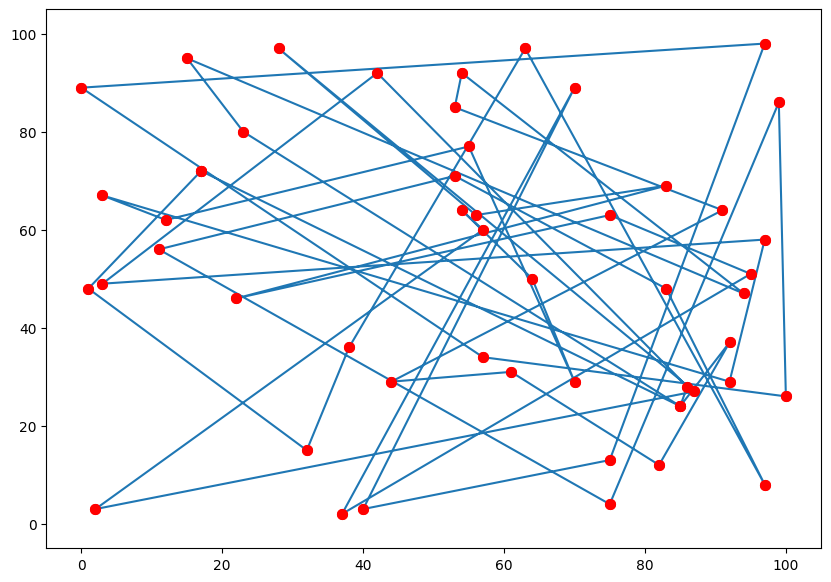

Length =  2732.717352082919
Solve time =  0.0036389827728271484


In [29]:
start_time = time.time()
rand_ins_tour = random_insertion_tsp(distance_matrix)
solve_time = time.time()-start_time
figure_TSP(rand_ins_tour)
total_length = total_distance(rand_ins_tour, distance_matrix)
print("Length = ",  total_length)
print("Solve time = ", solve_time)

### Destroy and rebuild metaheuristic
The destroy and rebuild metaheuristic builds on the random insertion heuristic by first constructing a tour using the latter method, then randomly removing a certain number of cities (usually half), from which again randomly one city after the other is drawn to be inserted at the best place (minimizing added costs). This denotes one iteration of the method. This metaheuristic approximates the optimal solution more accurately the more iterations (removals and insertions) we perform. 

In [ ]:
def random_insert_remove_tsp(distance_matrix, num_iterations=1000):
    """
    Solve the TSP problem using the random insert random remove metaheuristic.

    Args:
        distance_matrix: A square matrix where element (i,j) is the distance between city i and city j.
        num_iterations: Number of iterations to perform.

    Returns:
        A list containing the cities in the order they should be visited to obtain the shortest route.
    """
    num_cities = distance_matrix.shape[0]
    half_num_cities = round(num_cities/2)
    # create a first tour by using random insertion
    route = random_insertion_tsp(distance_matrix) 
    best_tour = route
    best_length = total_distance(route, distance_matrix)
    for i in range(num_iterations):
        # remove randomly half of the cities
        # use random insertion method as before to fill up the tour to full length 
        # (just copy paste the while loop)
        # check if these new found route is shorter than the best route so far 
        # (using total_distance(route, distance_matrix))
        # if yes, update the variables "best_tour" and "best_length"
    return best_tour

In [ ]:
# take a random sample of size H from a list
sample = random.sample(List, H)

# list comprehension: define a list buy manipulating elements from another list
# example: list1 = all elements in list2 that are not in list3
list1 = [el for el in list2 if el not in list3]

In [ ]:
start_time = time.time()
rand_ins_rem_tour = random_insert_remove_tsp(distance_matrix)
solve_time = time.time()-start_time
figure_TSP(rand_ins_rem_tour)
total_length = total_distance(rand_ins_rem_tour, distance_matrix)
print("Length = ",  total_length)
print("Solve time = ", solve_time)